### Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

In [1]:
import pandas as pd

df = pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


In [2]:
# importing librarires
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
# Columns as Features
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]



In [4]:
x1 = df[["Avg. Area Income"]]
x1.shape

(5000, 1)

In [5]:
y = df["Price"]


##### Ruta:
1. Cargamos el Conjunto de dato. divido en X e Y 

2. Partimos el conjunto en train y test
3. Creamos una variable que represente el modelo (inicializamos)
4. Fit (Entrenamos) el modelo con el conjunto Train
5. Calculamos el error de Train y de Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=110) 

In [7]:
#creating LinearRegression Object
lm = LinearRegression(n_jobs=-1)  # -1 to use all processors
#Training the Data Model
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [8]:
X_train.head()

,Avg. Area Income
15,73091.866746
411,36100.444227
220,73367.045991
2889,69692.473326
4111,71901.333527


In [9]:
y_train.head()

15      1.306675e+06
411     5.995040e+05
220     1.521731e+06
2889    1.104701e+06
4111    1.414295e+06
Name: Price, dtype: float64

In [10]:
lm.score(X_train, y_train) *100

41.477337561284045

In [11]:
lm.score(X_test, y_test) *100

38.696792496189744

In [12]:
X_test

,Avg. Area Income
3452,73497.307034
4814,82389.522278
1955,46991.786221
745,58464.305071
3070,80707.404914
...,...
2320,73101.218640
4122,57072.753432
4535,73490.599980
4052,82115.113830


In [13]:
predictions = lm.predict(X_test)

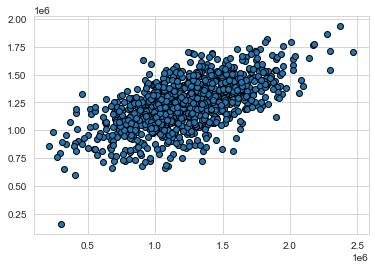

In [14]:
plt.scatter(y_test, predictions, edgecolor='black')

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

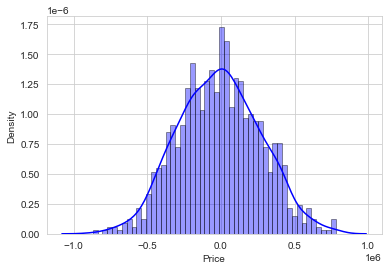

In [15]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 223527.2922355204
MSE: 76832547100.58768
RMSE: 277186.84510738903


#### Conclusión:
- Aunque mi modelo no sea el óptimo, la prediccion que puede dar a partir de los datos de los ingresos medios de las personas que viven en la casa, es suficiente, podemos ver que la regresion lineal es casi agrupada, teniendo solo un outlier (MSE: 76832547100.58768)que esta mas lejano en la evaluación, pero que lo podemos inferir a traves de su MSE. 

In [17]:
x2 = df[["Avg. Area House Age"]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=110) 
#creating LinearRegression Object
lm = LinearRegression(n_jobs=-1)  # -1 to use all processors
#Training the Data Model
lm.fit(X_train, y_train)

lm.score(X_train, y_train) *100

20.42458718584316

In [19]:
lm.score(X_test, y_test) *100

20.65856324315305

MAE: 251588.25935542292
MSE: 99440223845.87051
RMSE: 315341.4401024238


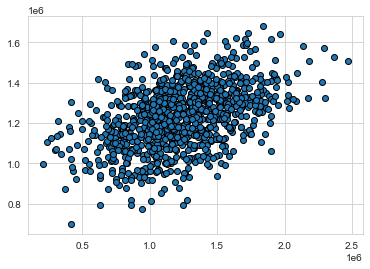

In [20]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions, edgecolor='black')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

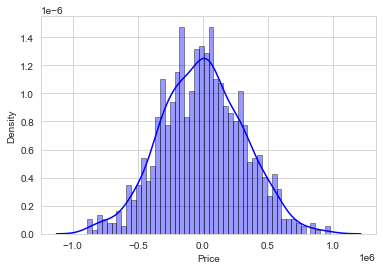

In [21]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

#### Conclusión: 
. Mi modelo no es lo suficientemente aceptable, tiene muchos errores al predecir el precio a traves de los valores de su entrenamiento, "edad de la casa", es posible que haya casas que tengan muchos años más y valgan bastante menos de lo que se espera o que no tengamos datos suficientes para realizar esta predicción de forma más eficiente.

In [22]:
x3 = df[["Avg. Area Number of Rooms"]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.2, random_state=110) 
#creating LinearRegression Object
lm = LinearRegression(n_jobs=-1)  # -1 to use all processors
#Training the Data Model
lm.fit(X_train, y_train)

lm.score(X_train, y_train) *100

10.996985415556704

In [24]:

lm.score(X_test, y_test) *100

12.287316594237808

MAE: 251465.8718138365
MSE: 100868916980.71336
RMSE: 317598.672825806


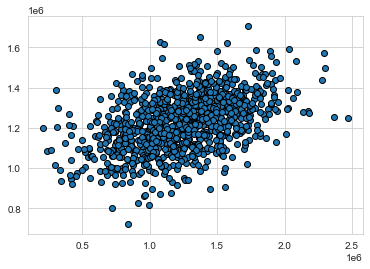

In [39]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions, edgecolor='black')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

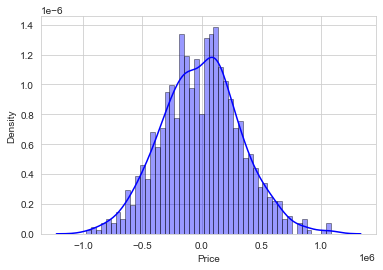

In [26]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

#### Conclusión:

Mi conjunto de entrenamiento tiene un porcentaje de acierto muy bajo, respecto al número de dormitorios que tiene la casa, para predecir el precio, no es óptimo; puede haber casas que teniendo más dormitorios cuesten mucho más, debido a otros factores.

In [27]:
x4 = df[["Avg. Area Number of Bedrooms"]]

x4.shape

(5000, 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x4, y, test_size=0.2, random_state=110) 
#creating LinearRegression Object
lm = LinearRegression(n_jobs=-1)  # -1 to use all processors
#Training the Data Model
lm.fit(X_train, y_train)

lm.score(X_train, y_train) *100

2.800818731839083

In [29]:
lm.score(X_test, y_test) *100

3.374719946487703

MAE: 277509.60843917157
MSE: 121102413448.06512
RMSE: 347997.72046389204


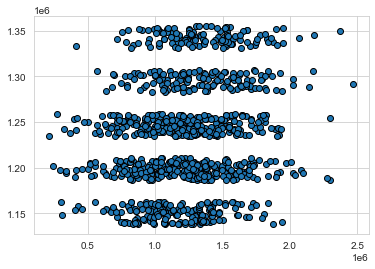

In [30]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions, edgecolor='black')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

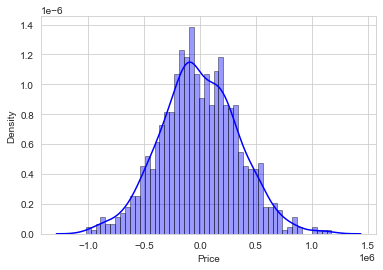

In [31]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

#### Conclusión: 
- El modelo es completamente errático con este entrenamiento a partir de datos relativos a la cantidad de "dormitorios".

In [34]:
x5 = df[["Area Population"]]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x5, y, test_size=0.2, random_state=110) 
#creating LinearRegression Object
lm = LinearRegression(n_jobs=-1)  # -1 to use all processors
#Training the Data Model
lm.fit(X_train, y_train)

lm.score(X_train, y_train) *100

15.95915832895427

In [36]:
lm.score(X_test, y_test) *100

19.518636545293134

MAE: 251465.8718138365
MSE: 100868916980.71336
RMSE: 317598.672825806


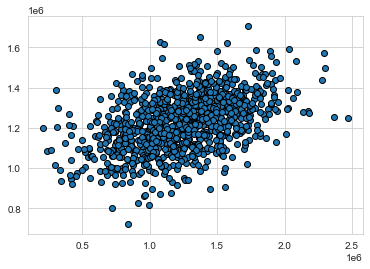

In [37]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions, edgecolor='black')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

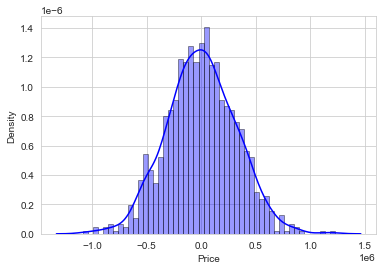

In [38]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

#### Conclusión:

- Podría decir que el modelo es fallido tambien, no podemos predecir el precio a partir de datos basados solo en el area de su población, nos faltan mas datos.